## https://github.com/priyamtejaswin/devise-keras/tree/master

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#from itertools import izip
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input 
import keras.backend as K
import h5py
import argparse 
import os, sys #, ipdb
#import cPickle as pickle
from tqdm import *

## https://github.com/priyamtejaswin/devise-keras/blob/master/extract_features_and_dump.py

In [13]:
IMAGE_DIM = 50

def define_model(path):

	input_shape = (224,224,3)

	# placeholder - input image tensor
	img_input = Input(shape=input_shape)

	# Block 1
	x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
	x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

	# Block 2
	x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
	x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

	# Block 3
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

	# Block 4
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

	# Block 5
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

	x = Flatten(name='flatten')(x)
	x = Dense(IMAGE_DIM, activation='relu', name='fc1')(x)
	x = Dense(IMAGE_DIM, activation='relu', name='fc2')(x)

	model = Model(inputs=img_input, outputs=x, name="vgg16")

	# load wts
	model.load_weights(path, by_name=True)
	
	# These are theano weights, but we are running on tensorflow backend, so convert 
	# theano kernels to tensorflow kernels . (channels_first, tf kernels)
	
    #from keras.utils import convert_all_kernels_in_model
	#convert_all_kernels_in_model(model)

	return model  

In [14]:
weightpath = 'C://Users/30694/Downloads/epoch_13.hdf5'

mymodel = define_model(weightpath)

In [15]:
mymodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Question:

- Is the epoch_13.hdf5 the correct to load or should I load cache.h5???

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from itertools import izip
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input 
import keras.backend as K
import h5py
import argparse 
import os, sys #, ipdb
#import cPickle as pickle
from tqdm import *

In [2]:
IMAGE_DIM = 50

def define_model(path):

	input_shape = (224,224,3)

	# placeholder - input image tensor
	img_input = Input(shape=input_shape)

	# Block 1
	x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
	x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

	# Block 2
	x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
	x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

	# Block 3
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

	# Block 4
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

	# Block 5
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

	x = Flatten(name='flatten')(x)
	x = Dense(IMAGE_DIM, activation='relu', name='fc1')(x)
	x = Dense(IMAGE_DIM, activation='relu', name='fc2')(x)

	model = Model(inputs=img_input, outputs=x, name="vgg16")

	# load wts
	model.load_weights(path, by_name=True)
	
	# These are theano weights, but we are running on tensorflow backend, so convert 
	# theano kernels to tensorflow kernels . (channels_first, tf kernels)
	
    #from keras.utils import convert_all_kernels_in_model
	#convert_all_kernels_in_model(model)

	return model  

In [3]:
weightpath = 'C://Users/30694/Downloads/cache.h5'

mymodel = define_model(weightpath)

In [4]:
mymodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## TODO

- Check the embeddings on both to see the results

## Glove embeddings

Search also word2vec_Stanford

In [5]:
word_to_embeddings = {}
word_list=[]
vec_list=[]
with open("C://Users/30694/Downloads/glove.6B.50d.txt", "r", encoding="utf8") as f:
    for line in f:
        word_vec = line.strip('\n').split( )
        word = word_vec[0]
        vec = np.array(word_vec[1:]).astype(float)
        word_to_embeddings[word] = vec
        word_list.append(word)
        vec_list.append(vec)
        #score.append(int(line.strip()))

In [6]:
word_to_embeddings['for']

array([ 0.15272 ,  0.36181 , -0.22168 ,  0.066051,  0.13029 ,  0.37075 ,
       -0.75874 , -0.44722 ,  0.22563 ,  0.10208 ,  0.054225,  0.13494 ,
       -0.43052 , -0.2134  ,  0.56139 , -0.21445 ,  0.077974,  0.10137 ,
       -0.51306 , -0.40295 ,  0.40639 ,  0.23309 ,  0.20696 , -0.12668 ,
       -0.50634 , -1.7131  ,  0.077183, -0.39138 , -0.10594 , -0.23743 ,
        3.9552  ,  0.66596 , -0.61841 , -0.3268  ,  0.37021 ,  0.25764 ,
        0.38977 ,  0.27121 ,  0.043024, -0.34322 ,  0.020339,  0.2142  ,
        0.044097,  0.14003 , -0.20079 ,  0.074794, -0.36076 ,  0.43382 ,
       -0.084617,  0.1214  ])

In [8]:
word_list[:10]

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]

In [9]:
vec_list[:3]

[array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01]),
 array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.41634 , -0.15428 ,  0.10068 ,  0.48

In [10]:
len(vec_list)

400000

## Work on specific instance and find Nearest Neighbor  (Not approximate)

## https://github.com/priyamtejaswin/devise-keras/blob/master/extract_features_and_dump.py

In [15]:
imgPath = 'C://Users/30694/Desktop/Google_Image_Search/Pascal_Sample_occluded/bus1.jpg'

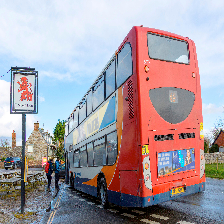

In [17]:
img = image.load_img(imgPath, target_size=(224, 224))
img

In [18]:
loaded_images = []
img = image.img_to_array(img)
loaded_images.append(img)

In [19]:
loaded_images = np.array(loaded_images)
loaded_images.shape

(1, 224, 224, 3)

In [20]:
batch = preprocess_input(loaded_images)

In [21]:
scores = mymodel.predict(batch)

In [22]:
scores.shape

(1, 50)

In [23]:
scores

array([[0.0950034 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0012328 , 0.        , 0.27301785,
        0.        , 0.3812366 , 0.        , 0.        , 0.5525592 ,
        0.04965357, 0.        , 0.        , 0.03349864, 0.05911363,
        0.        , 0.        , 0.        , 0.21943714, 0.        ,
        0.        , 0.15907308, 0.20723312, 0.12908481, 0.1037076 ,
        0.        , 0.5348237 , 0.        , 0.05443479, 0.06947672,
        0.        , 0.03526341, 0.        , 0.        , 0.189958  ,
        0.2822431 , 0.        , 0.2327904 , 0.06379167, 0.13390149,
        0.0045258 , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

## Get the nearest neighbor

## https://github.com/priyamtejaswin/devise-keras/blob/master/validation_script.py


In [25]:
word_set = set(word_list)

In [40]:
classes = ['bus', 'car', 'bicycle', 'man', 'woman', 'person', 'bike', 'airplane', 'traffic', 
           'sign', 'train', 'truck', 'road', 'hair', 'window', 'door', 'kid', 'light' ,'boat',
          'aeroplane', 'motorbike', 'signal']
i=0
for item in classes:
    print(i, item in word_set, item)
    i+=1

0 True bus
1 True car
2 True bicycle
3 True man
4 True woman
5 True person
6 True bike
7 True airplane
8 True traffic
9 True sign
10 True train
11 True truck
12 True road
13 True hair
14 True window
15 True door
16 True kid
17 True light
18 True boat
19 True aeroplane
20 True motorbike
21 True signal


In [43]:
word_list.index('bus')

1708

In [ ]:
vec_list['bus']

In [46]:
class_embeddings

NameError: name 'class_embeddings' is not defined

In [48]:
# Keep only those word_embed and word_names that are present in dataset 
class_embeddings = []
for cls in classes:
    idx = word_list.index(cls) # get the index of the class
    class_embeddings.append(vec_list[idx]) # append the word embedding
    
class_embeddings = np.array(class_embeddings)
class_embeddings = class_embeddings / np.linalg.norm(class_embeddings, axis=1, keepdims=True)

In [49]:
preds = scores / np.linalg.norm(scores)

diff = class_embeddings - preds
diff = np.linalg.norm(diff, axis=1)

min_idx = np.argsort(diff)

In [50]:
min_idx

array([ 9,  8,  5,  6, 10, 16,  1,  7, 18,  0, 13,  2, 14,  3, 11, 20, 15,
        4, 19, 17, 21, 12], dtype=int64)

In [55]:
closest_words = []
for i in min_idx[:3]:
    # print self.unique_classes[i]
    closest_words.append(classes[i])

In [56]:
closest_words

['sign', 'traffic', 'person']

## Summary:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from itertools import izip
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input 
import keras.backend as K
import h5py
import argparse 
import os, sys #, ipdb
#import cPickle as pickle
from tqdm import *

In [2]:
IMAGE_DIM = 50

def define_model(path):

	input_shape = (224,224,3)

	# placeholder - input image tensor
	img_input = Input(shape=input_shape)

	# Block 1
	x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
	x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

	# Block 2
	x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
	x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

	# Block 3
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
	x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

	# Block 4
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

	# Block 5
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
	x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
	x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

	x = Flatten(name='flatten')(x)
	x = Dense(IMAGE_DIM, activation='relu', name='fc1')(x)
	x = Dense(IMAGE_DIM, activation='relu', name='fc2')(x)

	model = Model(inputs=img_input, outputs=x, name="vgg16")

	# load wts
	model.load_weights(path, by_name=True)
	
	# These are theano weights, but we are running on tensorflow backend, so convert 
	# theano kernels to tensorflow kernels . (channels_first, tf kernels)
	
    #from keras.utils import convert_all_kernels_in_model
	#convert_all_kernels_in_model(model)

	return model  

In [3]:
weightpath = 'C://Users/30694/Downloads/cache.h5'

mymodel = define_model(weightpath)

In [5]:
word_to_embeddings = {}
word_list=[]
vec_list=[]
with open("C://Users/30694/Downloads/glove.6B.50d.txt", "r", encoding="utf8") as f:
    for line in f:
        word_vec = line.strip('\n').split( )
        word = word_vec[0]
        vec = np.array(word_vec[1:]).astype(float)
        word_to_embeddings[word] = vec
        word_list.append(word)
        vec_list.append(vec)
        #score.append(int(line.strip()))

In [64]:
classes = ['bus', 'car', 'bicycle', 'man', 'woman', 'person', 'bike', 'airplane', 'traffic', 
           'sign', 'train', 'truck', 'road', 'hair', 'window', 'door', 'kid', 'light' ,'boat',
          'aeroplane', 'motorbike', 'signal', 'wheel']
i=0
for item in classes:
    print(i, item in word_set, item)
    i+=1

0 True bus
1 True car
2 True bicycle
3 True man
4 True woman
5 True person
6 True bike
7 True airplane
8 True traffic
9 True sign
10 True train
11 True truck
12 True road
13 True hair
14 True window
15 True door
16 True kid
17 True light
18 True boat
19 True aeroplane
20 True motorbike
21 True signal
22 True wheel


In [65]:
# Keep only those word_embed and word_names that are present in dataset 
class_embeddings = []
for cls in classes:
    idx = word_list.index(cls) # get the index of the class
    class_embeddings.append(vec_list[idx]) # append the word embedding

class_embeddings = np.array(class_embeddings)
class_embeddings = class_embeddings / np.linalg.norm(class_embeddings, axis=1, keepdims=True)

In [66]:
def label_image_knn_devise(imgPath, kNN=3):
    img = image.load_img(imgPath, target_size=(224, 224)) #(224,224,3)
    loaded_images = []
    img = image.img_to_array(img)
    loaded_images.append(img)
    loaded_images = np.array(loaded_images) # (1,224,224,3)
    
    batch = preprocess_input(loaded_images)
    preds = mymodel.predict(batch) #(1,50)
    preds = preds / np.linalg.norm(preds)

    diff = class_embeddings - preds
    diff = np.linalg.norm(diff, axis=1)

    min_idx = np.argsort(diff)
    closest_words = []
    for i in min_idx[:kNN]:
        # print self.unique_classes[i]
        closest_words.append(classes[i])
        
    return closest_words

In [67]:
imgPath = 'C://Users/30694/Desktop/Google_Image_Search/Pascal_Sample_occluded/bicycle.jpg'
label_image_knn_devise(imgPath)

['person', 'kid', 'train']

In [68]:
imgPath = 'C://Users/30694/Desktop/Google_Image_Search/Pascal_Sample_occluded/motor1.jpg'
label_image_knn_devise(imgPath)

['person', 'kid', 'sign']

In [69]:
imgPath = 'C://Users/30694/Desktop/Google_Image_Search/Pascal_Sample_occluded/traffic.jpg'
label_image_knn_devise(imgPath)

['person', 'kid', 'sign']

In [70]:
imgPath = 'C://Users/30694/Desktop/Google_Image_Search/Pascal_Sample_occluded/car1.jpg'
label_image_knn_devise(imgPath)

['traffic', 'sign', 'person']

In [71]:
imgPath = 'C://Users/30694/Desktop/Google_Image_Search/Pascal_Sample_occluded/000000291634.jpg'
label_image_knn_devise(imgPath)

['kid', 'person', 'sign']

In [72]:
imgPath = 'C://Users/30694/Desktop/Google_Image_Search/Pascal_Sample_occluded/wheel_1.png'
label_image_knn_devise(imgPath)

['kid', 'person', 'train']

In [24]:
np.argsort([4,5,2,1,6,7,-4,0,-1,8])  # increasing

array([6, 8, 7, 3, 2, 0, 1, 4, 5, 9], dtype=int64)

## How to find the most similar embedding given an image??

## Nearest Neighbors for Glove embeddings

### https://stackoverflow.com/questions/32446703/find-closest-vector-from-a-list-of-vectors-python

### https://datascience.stackexchange.com/questions/10898/method-for-finding-top-k-cosine-similarity-based-closest-item-on-large-dataset/23667

### https://datascience.stackexchange.com/questions/62112/is-annoy-a-machine-learning-algorithm-to-find-nearest-neighbor-and-is-it-simil

### https://radimrehurek.com/gensim/auto_examples/



In [13]:
from scipy import spatial

tree_embeddings = spatial.KDTree(vec_list)

The first return value is the distance of the closest neighbor and the second its position in A, such that you can obtain it for example like this:

`A[ tree.query([0.5,0.5,0.5,0.5,0.5])[1] ] 
[1, 0, 1, 0, 1]`

In [ ]:
tree.query([0.5,0.5,0.5,0.5,0.5])  # 

In [11]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [12]:
glove_file = datapath('C://Users/30694/Downloads/glove.6B.50d.txt')
word2vec_glove_file = get_tmpfile("C://Users/30694/Downloads/glove.6B.50d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

NotImplementedError: Unable to handle scheme 'c', expected one of ('', 'file', 'hdfs', 'http', 'https', 's3', 's3a', 's3n', 's3u', 'scp', 'sftp', 'ssh', 'webhdfs'). Extra dependencies required by 'c' may be missing. See <https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst> for details.